In [1]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np

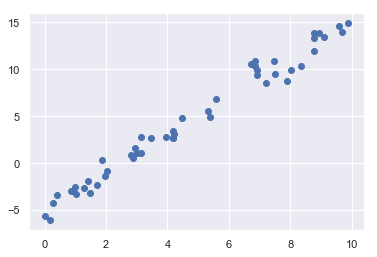

In [2]:
rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=2*x-5+rng.randn(50)
plt.scatter(x,y)
plt.show()

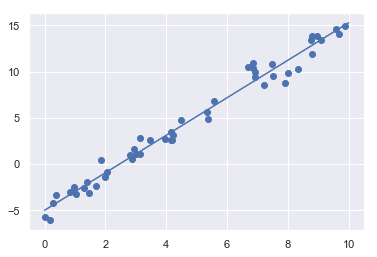

In [3]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis],y)
xfit=np.linspace(0,10,1000)
yfit=model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.show()

In [4]:
print("Model slope:",model.coef_[0])
print("Model intercept:",model.intercept_)

Model slope: 2.027208810360695
Model intercept: -4.998577085553202


In [5]:
rng=np.random.RandomState(1)
x=10*rng.rand(100,3)
y=0.5+np.dot(x,[1.5,-2.,1.])
model.fit(x,y)
print(model.intercept_)
print(model.coef_)

0.5000000000000144
[ 1.5 -2.   1. ]


In [6]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([2,3,4])
poly=PolynomialFeatures(3,include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [7]:
from sklearn.pipeline import make_pipeline
poly_model=make_pipeline(PolynomialFeatures(7),LinearRegression())

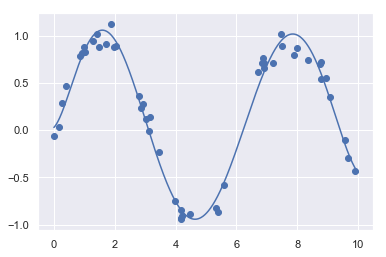

In [8]:
rng=np.random.RandomState(1)
x=10*rng.rand(50)
y=np.sin(x)+0.1*rng.randn(50)
poly_model.fit(x[:,np.newaxis],y)
yfit=poly_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.show()

## 高斯基函數

In [9]:
from sklearn.base import BaseEstimator,TransformerMixin
class GaussianFeatures(BaseEstimator,TransformerMixin):
    def __init__(self,N,width_factor=2.0):
        self.N=N
        self.width_factor=width_factor
    def _gauss_basis(x,y,width,axis=None):
        arg=(x-y)/width
        return np.exp(-0.5*np.sum(arg**2,axis))
    def fit(self,X,y=None):
        self.centers_=np.linspace(X.min(),X.max(),self.N)
        self.width_=self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    def transform(self,X):
        return self._gauss_basis(X[:,:,np.newaxis],self.centers_,self.width_,axis=1)


In [10]:
gauss_model=make_pipeline(GaussianFeatures(20),LinearRegression())
gauss_model.fit(x[:,np.newaxis],y)
yfit=gauss_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10)
plt.show()

TypeError: _gauss_basis() got multiple values for argument 'axis'

In [ ]:
def basis_plot(model,title=None):
    fig,ax=plt.subplots(2,sharex=True)
    model.fit(x[:,np.newaxis],y)
    ax[0].scatter(x,y)
    ax[0].plot(xfit,model.predict(xfit[:,np.newaxis]))
    ax[0].set(xlabel='x',ylabel='y',ylim=(-1.5,1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',ylabel='coefficient',xlim=(0,10))
model=make_pipeline(GaussianFeatures(30),LinearRegression())
basis_plot(model)

## 轉log,平方根

In [ ]:
x_log=np.log(x)
y_sqrt=np.sqrt(y)
x_fit=np.arange(x_log.min()-1,x_log.max()+1,1)[:,np.newaxis]
regr=regr.fit(x_log,y_sqrt)
y_lin_fit=regr.predict(x_fit)
linear_r2=r2_score(y_sqrt,regr.predict(x_log))
plt.scatter(x_log,y_sqrt,label='training points',color='lightgray')
plt.plot(x_fit,y_lin_fit,label='linear(d=1),$R^2=%.2f$' % linear_r2,color='blue',lw=2)
plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{price \; in \; \$1000\'s[MEDV]}$')
plt.legend(loc='lower left')
plt.show()

## RANSAC演算法

In [ ]:
from sklearn.linear_model import RANSACRegressor
ransac=RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,residual_metric=lambda x:np.sum(np.abs(x),axis=1),residual_threshold=5.0,random_state=0)
ransac.fit(x,y)

In [ ]:
inlier_mask=ransac.inlier_mask_
outlier_mask=np.logical_not(inlier_mask)
line_x=np.arange(3,10,1)
line_y_ransac=ransac.predict(line_x[:,np.newaxis])
plt.scatter(x[inlier_mask],y[inlier_mask],c='blue',marker='o',label='Inliers')
plt.scatter(x[outlier_mask],y[outlier_mask],c='lightgreen',marker='s',label='Outliers')
plt.plot(line_x,line_y_ransac,color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
ple.legend(loc='upper left')
plt.show()

In [ ]:
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='lightgreen',marker='s',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-10,50])
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train:%.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))

In [ ]:
from sklearn.metrics import r2_score
print('R^2 train:%.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

## Ridge

In [ ]:
from sklearn.linear_model import Ridge
model=make_pipeline(GaussianFeatures(30),Ridge(alpha=0.1))
basis_plot(model,title='Ridge Regression')

## Lasso

In [ ]:
from sklearn.linear_model import Lasso
model=make_pipeline(GaussianFeatures(30),Lasso(alpha=0.001))
basis_plot(model,title='Lasso Regression')

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
lasso=ElasticNet(alpha=1.0,l1_ratio=0.5)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
x=df[['LSTAT']].values
y=df['MEDV'].values
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(x,y)
sort_idx=x.flatten().argsort()


In [ ]:
def lin_regplot(x,y,model):
    plt.scatter(x,y,c='blue')
    plt.plot(x,model.predict(x),color='red')
    return None

In [ ]:
lin_regplot(x[sort_idx],y[sort_idx],tree)
plt.xlabel('%lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(x_train,y_train)
y_train_pred=forest.predict(x_train)
y_test_pred=forest.predict(x_test)
print('MSE train:%.3f,test:%.3f' % (mean_squared_error(y_train,y_train_pred),mean_squared_error(y_test,y_test_pred)))
print('R^2 train:%.3f,test:%.3f' % (r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred)))

In [ ]:
plt.scatter(y_train_pred,y_train_pred-y_train,marker='o',s=35,alpha=0.5,label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='lightgreen',marker='s',s=35,alpha=0.7,label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='red')
plt.xlim([-10,50])
plt.show()